In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# Load data
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vRC4x6mecC7EkofiP3uJWZ3Y1jD1B2QMZXjlFtdP9-TOan6Fms2TqyOyssHegjTeG7iM6f-qX89vfvK/pub?gid=0&single=true&output=csv"
df = pd.read_csv(url)
df['Date'] = pd.to_datetime(df['Date'], format='%m-%Y')
df.set_index('Date', inplace=True)
df['Biomass']=df['Biomass'].dropna()

In [4]:
# Scaling the data - optional but recommended
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Biomass'].values.reshape(-1, 1))

# Define your dataset creation function
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back - 1):
        a = data[i:(i + look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Define look_back period
look_back = 5
X, y = create_dataset(scaled_data, look_back)

In [5]:
# Define the ANN model
model = Sequential()
model.add(Dense(50, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.4770
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 0.4137
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.3603
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 0.3125
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.2710
Epoch 6/100
3/3 [==============================] - 0s 1ms/step - loss: 0.2320
Epoch 7/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1987
Epoch 8/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1687
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.1436
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.1212
Epoch 11/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1018
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0859
Epoch 13/100
3/3 [==============================] - 0s 4ms/st

In [6]:
# Define the ANN model
model = Sequential()
model.add(Dense(50, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X, y, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
3/3 [==============================] - 0s 2ms/step - loss: 0.3884
Epoch 2/100
3/3 [==============================] - 0s 3ms/step - loss: 0.3205
Epoch 3/100
3/3 [==============================] - 0s 3ms/step - loss: 0.2637
Epoch 4/100
3/3 [==============================] - 0s 2ms/step - loss: 0.2126
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1683
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.1314
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 0.0995
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0766
Epoch 9/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0587
Epoch 10/100
3/3 [==============================] - 0s 1ms/step - loss: 0.0462
Epoch 11/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0390
Epoch 12/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0345
Epoch 13/100
3/3 [==============================] - 0s 1ms/st

In [9]:
# Making predictions
y_pred = model.predict(X)

# Inverse transform to get actual values
y_pred = scaler.inverse_transform(y_pred)
y_actual = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate metrics
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

print(f'MAE: {mae}, MSE: {mse}, R-squared: {r2},MAPE:{mape}')


MAE: 24.751459327110872, MSE: 894.3998768717146, R-squared: 0.6416495475225916,MAPE:9.497178204908376


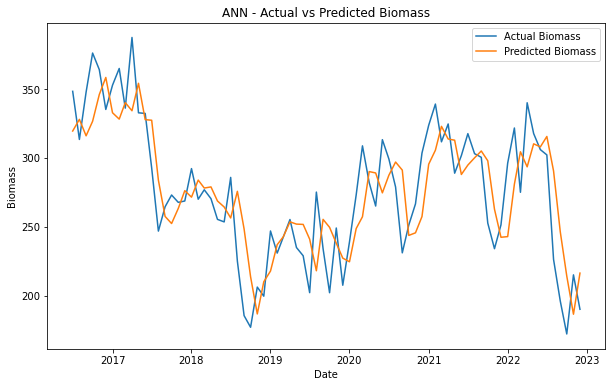

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[-len(y):], y_actual, label='Actual Biomass')
plt.plot(df.index[-len(y_pred):], y_pred, label='Predicted Biomass')
plt.title('ANN - Actual vs Predicted Biomass')
plt.xlabel('Date')
plt.ylabel('Biomass')
plt.legend()
plt.show()

In [11]:
# Forecast future values for the next 30 months
future_months = 30
future_predictions = []
last_window = scaled_data[-look_back:].reshape(1, -1)  # Reshape to (1, look_back)

for _ in range(future_months):
    # Predict the next value
    pred = model.predict(last_window)
    future_predictions.append(pred[0, 0])
    # Update the window for the next prediction
    # Shift the window and append the new prediction
    last_window = np.append(last_window[:,1:], pred).reshape(1, -1)

# Inverse transform the predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))


In [12]:
# Create a time index for the forecasted values
last_date = df.index[-1]
future_dates = pd.date_range(start=last_date, periods=future_months + 1, freq='M')[1:]

# Convert predictions to a pandas Series
future_series = pd.Series(future_predictions.flatten(), index=future_dates)

# Concatenate with the original data for plotting
full_series = pd.concat([df['Biomass'], future_series])


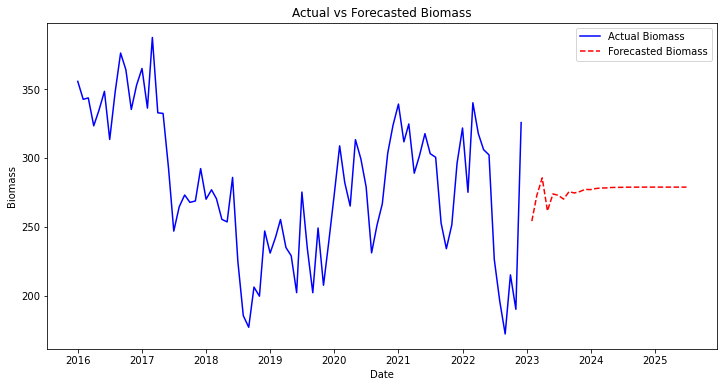

In [13]:
# Plotting the original and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Biomass'], label='Actual Biomass', color='blue')
plt.plot(future_series.index, future_series, label='Forecasted Biomass', color='red', linestyle='dashed')
plt.title('Actual vs Forecasted Biomass')
plt.xlabel('Date')
plt.ylabel('Biomass')
plt.legend()
plt.show()
